In [1]:
import os

import numpy as np
import jax.numpy as jnp
import matplotlib.pyplot as plt

import appletree as apt
from appletree.utils import get_file_path

In [2]:
apt.set_gpu_memory_usage(0.2)

# Likelihood configuration

In [3]:
config = dict(
    data_file_name = get_file_path('data_Rn220.csv'),
    bins_type = 'equiprob',
    bins_on = ['cs1', 'cs2'],
    bins = [15, 15],
    x_clip = [0, 100],
    y_clip = [2e2, 1e4],
)

llh = apt.Likelihood(**config)

# Register components

In [4]:
# Register components
llh.register_component(apt.ERBand, 'rn220_er')
llh.register_component(apt.AC, 'rn220_ac', file_name='AC_Rn220.pkl')

# To see all the components
llh.print_likelihood_summary(short=True)


----------------------------------------
BINNING

    bins_type: equiprob
    bins_on: ['cs1', 'cs2']

----------------------------------------
DATA

    file_name: /home/xudc/appletree/appletree/data/data_Rn220.csv
    data_rate: 2000.0

----------------------------------------
MODEL

    COMPONENT 0: rn220_er
        type: simulation
        rate_par: rn220_er_rate
        pars: {'rn220_er_rate', 'drift_velocity', 'g2', 'py0', 'py1', 'py3', 'field', 'fano', 'rf0', 'w', 'rf1', 'py2', 'py4', 'nex_ni_ratio', 'gas_gain', 'g1', 'p_dpe', 's2_threshold'}

    COMPONENT 1: rn220_ac
        type: fixed
        file_name: AC_Rn220.pkl
        rate_par: rn220_ac_rate
        pars: {'rn220_ac_rate'}

----------------------------------------


# Load parameters

In [5]:
# Load parameters(and their priors) in simulation. Note: these parameters will be shared among components

par_manager = apt.Parameter(get_file_path('er_sr0.json'))

par_manager.sample_init()

parameters = par_manager.get_all_parameter()

# Have to specify the normalization factor of each component
parameters['rn220_ac_rate'] = parameters['ac_rate']
parameters['rn220_er_rate'] = parameters['er_rate']

# Generate histogram under parameters

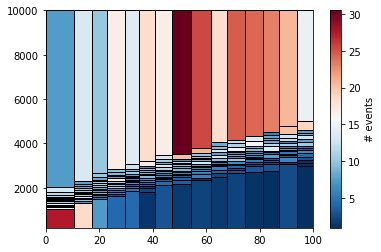

In [6]:
key = apt.get_key()

key, hist = llh._simulate_model_hist(key, int(1e6), parameters)
apt.plot_irreg_histogram_2d(*llh._bins, hist)
plt.show()

key, log_llh = llh.get_log_likelihood(key, int(1e6), parameters)

In [7]:
print(f'The log (posterior) LLH is {log_llh:.2f} now.')

The log (posterior) LLH is 1934.18 now.
